# Intro to Plotting

## Objectives

* Plot data from a Pandas DataFrame using Pandas' plotting tools
* Use matplotlib to take more control of figures
* Understand matplotlib's Figures and Axes
* Know some advantages to using seaborn

This is a little bit of IPython magic that causes plots to show up inline in the Notebook instead of in a separate window:

In [1]:
%matplotlib inline

## Plotting with Pandas

Pandas has some convenient routines for making plots straight out from data in DataFrames and Series.

We'll use the same data from the Pandas lesson:

In [2]:
import pandas as pd

In [3]:
monthly = pd.read_csv('precip_monthly.csv')

Let's start with plot of the mean California rainfall over the years.
The first step will be to use groupby ot aggregate the data by year:

In [4]:
yearly = monthly.groupby('year').precip.mean()
yearly.head()

year
1987    1.435867
1988    1.791026
1989    2.175821
1990    1.668407
1991    1.787778
Name: precip, dtype: float64

That gives us a Series, which has a `.plot` method for plotting the index of the Series vs. the values:

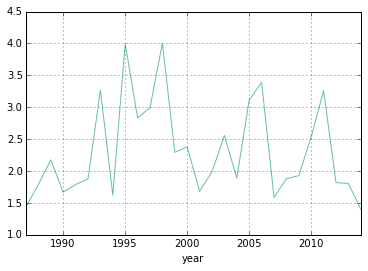

In [5]:
yearly.plot()

Or we can compare regions and make a bar chart:

In [6]:
regional = monthly.groupby('region').precip.mean()
regional

region
CENTRAL COAST        1.870413
COLORADO RIVER       0.299043
NORTH COAST          3.564866
NORTH LAHONTAN       1.722785
SACRAMENTO RIVER     3.365458
SAN FRANCISCO BAY    2.514868
SAN JOAQUIN RIVER    2.268685
SOUTH COAST          1.427060
SOUTH LAHONTAN       0.945169
TULARE LAKE          1.863512
Name: precip, dtype: float64

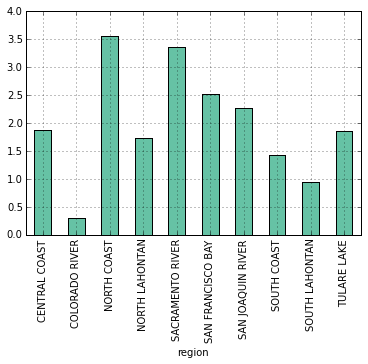

In [7]:
regional.plot(kind='bar')

This is a lot easier to read if it's sorted:

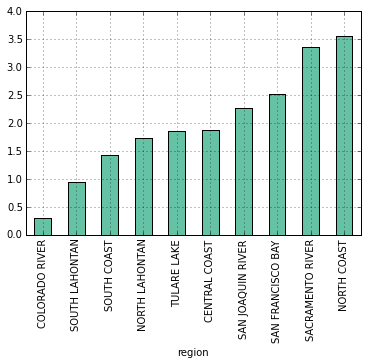

In [8]:
regional.sort(inplace=False).plot(kind='bar')

(Check this map if you're curous where these different regions are: http://www.oocities.org/watergeographer/hydromap.gif.)

If you have a DataFrame of data with the same kind of data in each column you can use the `.plot` method to create plots with different lines (or other styles) for each column.
But first we need to make a DataFrame with data laid out in that way.
Let's compare average rainfall in each region over time, which requires grouping on year *and* region then calculating the mean:

In [9]:
regional_yearly = monthly.groupby(['year', 'region']).precip.mean()
regional_yearly.head(15)

year  region           
1987  CENTRAL COAST        1.090809
      COLORADO RIVER       0.247500
      NORTH COAST          2.681029
      NORTH LAHONTAN       0.891042
      SACRAMENTO RIVER     1.816042
      SAN FRANCISCO BAY    1.335000
      SAN JOAQUIN RIVER    1.229135
      SOUTH COAST          0.819286
      SOUTH LAHONTAN       0.637162
      TULARE LAKE          1.239474
1988  CENTRAL COAST        1.430694
      COLORADO RIVER       0.455417
      NORTH COAST          2.919242
      NORTH LAHONTAN       1.056458
      SACRAMENTO RIVER     2.332746
Name: precip, dtype: float64

`regional_yearly` is a Series with a two-level index (a `MultiIndex`), one for year and one for region.
What we're after is a DataFrame with regions as columns and precip values for each region/year in the table.
The Series `.unstack()` method can be used to pivot index labels into column labels:

In [10]:
regional_yearly = regional_yearly.unstack(level='region')
regional_yearly.head()

region,CENTRAL COAST,COLORADO RIVER,NORTH COAST,NORTH LAHONTAN,SACRAMENTO RIVER,SAN FRANCISCO BAY,SAN JOAQUIN RIVER,SOUTH COAST,SOUTH LAHONTAN,TULARE LAKE
year,,,,,,,,,,
1987,1.090809,0.247500,2.681029,0.891042,1.816042,1.335000,1.229135,0.819286,0.637162,1.239474
1988,1.430694,0.455417,2.919242,1.056458,2.332746,1.744444,1.492066,1.517584,1.046987,1.483174
1989,1.226241,0.116250,3.560303,2.075486,3.307723,1.884028,1.860304,0.976944,0.851603,1.580833
1990,0.946806,0.226458,2.782821,1.415625,2.405227,1.486310,1.587179,0.892629,0.762308,1.118742
1991,1.624861,0.312708,2.341033,1.318645,2.308409,1.592619,1.726571,1.506389,0.956026,1.647933


Now we can use `.plot` to get a different line on the plot for every region:

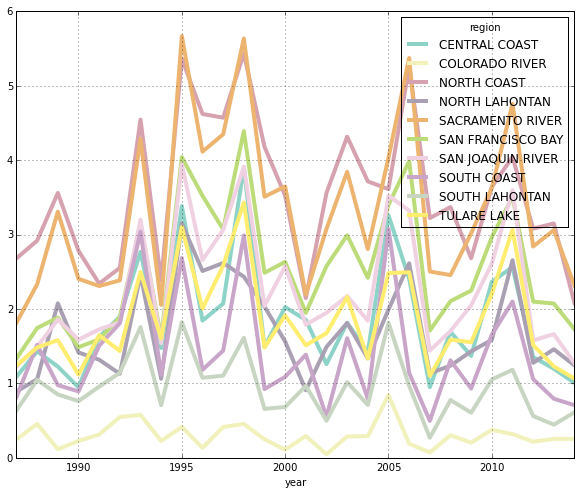

In [11]:
regional_yearly.plot(kind='line', figsize=(10, 8), colormap='Set3', linewidth=4)

That's a lot of lines, though.
We can use a box plot to more clearly see regional variation, but it masks the yearly variation (as with a bar chart).

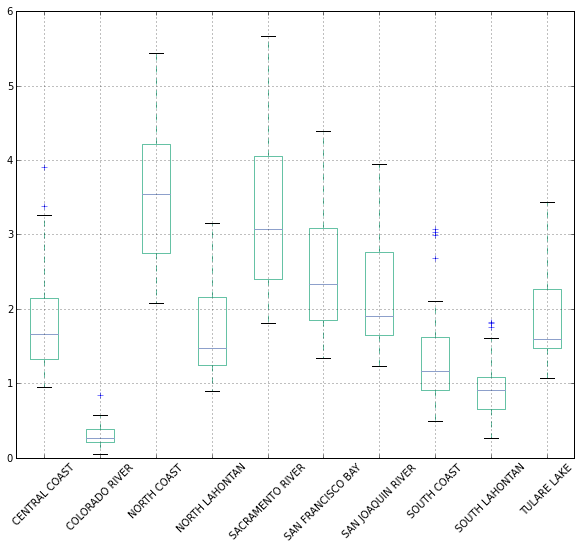

In [12]:
regional_yearly.plot(kind='box', figsize=(10, 8), rot=45)

### Exercise

The `monthly` DataFrame has a `'pct of avg'` column that describes how the amount of measured precipitation compares to the previously recorded average.
Use the `'pct of avg'` column to make plots like those above, and feel free to experiment!

**Note!** You can't use `.pct of avg` to refer to the `'pct of avg'` column. Use `['pct of avg']` instead.

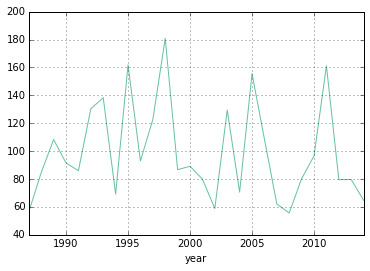

In [13]:
monthly.groupby('year')['pct of avg'].mean().plot()

In [14]:
regional_yearly = monthly.groupby(['year', 'region'])['pct of avg'].mean().unstack(level='region')
regional_yearly.head()

region,CENTRAL COAST,COLORADO RIVER,NORTH COAST,NORTH LAHONTAN,SACRAMENTO RIVER,SAN FRANCISCO BAY,SAN JOAQUIN RIVER,SOUTH COAST,SOUTH LAHONTAN,TULARE LAKE
year,,,,,,,,,,
1987,42.963235,127.191489,66.625000,49.486111,51.272727,29.791667,37.525641,79.644578,63.905405,64.423197
1988,84.159722,160.106383,79.102273,65.840278,73.265152,71.763889,75.301639,103.971591,116.647436,90.897281
1989,73.601504,29.212766,110.083333,138.909722,152.764706,109.555556,117.412162,47.780899,71.961538,87.750809
1990,73.187500,101.021277,115.355311,103.604167,96.526515,110.535714,85.653846,93.023121,90.865385,62.351171
1991,84.104167,94.978723,95.228782,104.612903,87.687500,78.059524,77.919872,111.814607,77.525641,63.824916


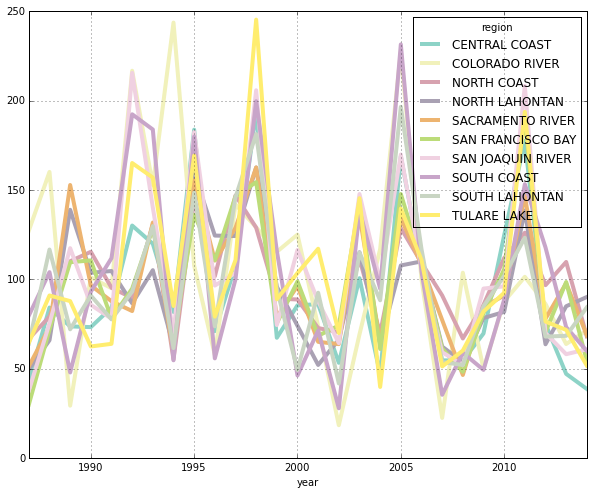

In [15]:
regional_yearly.plot(kind='line', figsize=(10, 8), colormap='Set3', linewidth=4)

We'll come back to the `'pct of avg'` plot in a few minutes.

## matplotlib

Pandas is making the above plots using a library called [matplotlib](http://matplotlib.org/).
The Pandas `.plot()` method is great for quickly creating plots from data in a DataFrame or Series,
but maybe your data is in NumPy arrays or you want more control than Pandas gives you.
In those situations you'll likely start working with matplotlib directly.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.style as style

Plotting in matplotlib begins with getting something on which to draw.
In matplotlib there are two levels of plot containers, axes and figures:

- Axes contain plots. Everything we've seen above is an example of a single axes containing one or more plot elements.
- Figures contain axes. In the examples so far every figure has contained one axes, but we'll see in a moment how to make a figure containing multiple axes (often referred to as subplots).

Let's remake the first `'pct of avg'` plot from above.
First we'll need the data.

In [17]:
yearly = monthly.groupby('year')['pct of avg'].mean()
yearly.head()

year
1987     56.541045
1988     84.637287
1989    108.288805
1990     91.474074
1991     85.965470
Name: pct of avg, dtype: float64

The index of the `yearly` Series are the x-values we want, and the values are y.
We use the `subplots` function to make figures and axes.
Axes have a `.plot` method that takes, among other things, arrays of x and y values to plot:

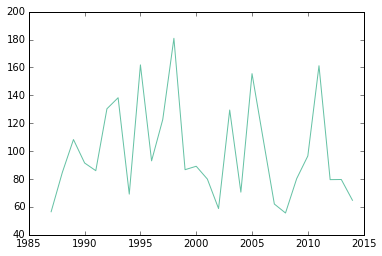

In [18]:
fig, ax = plt.subplots()
ax.plot(yearly.index, yearly)

A nice feature of having the figure and axes in variables is that we can continue to modify the plot by adding labels, grids, titles, etc.
(After modifying the plot we need to echo the figure variable to get everything to show up again.)

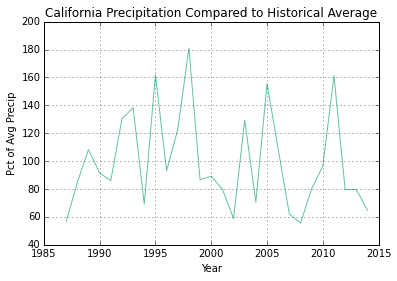

In [19]:
ax.set_xlabel('Year')
ax.set_ylabel('Pct of Avg Precip')
ax.set_title('California Precipitation Compared to Historical Average')
ax.grid(True)
fig

If you wanted, you could now use the `fig` variable to save this plot to a file.

In [20]:
fig.savefig('ca_pct_of_avg.png')

### A Note on Style

Many people do not like matplotlib's default plot styling.
You can change plot styles in a number of ways, but one of the easiest is to select from matplotlib's builtin style sheets: http://matplotlib.org/gallery.html#style_sheets.
I like the 'bmh' style, so let's activate that and remake the above plot:

In [21]:
style.available

['grayscale', 'bmh', 'dark_background', 'fivethirtyeight', 'ggplot']

In [22]:
style.use('bmh')

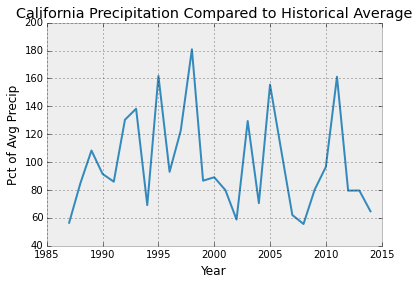

In [23]:
fig, ax = plt.subplots()
ax.plot(yearly.index, yearly)
ax.set_xlabel('Year')
ax.set_ylabel('Pct of Avg Precip')
ax.set_title('California Precipitation Compared to Historical Average')
ax.grid(True)

That plot style will remain in effect for the rest of the notebook or until we change it to something else.

### Markers and lines

To make it a bit easier to see where the data points are we can add markers to the plot
using the `marker` keyword:

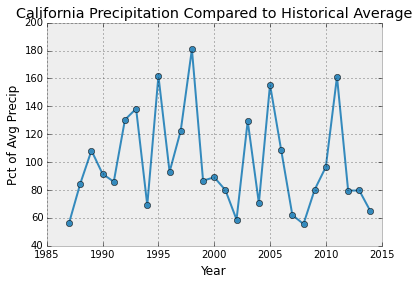

In [24]:
fig, ax = plt.subplots()
ax.plot(yearly.index, yearly, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Pct of Avg Precip')
ax.set_title('California Precipitation Compared to Historical Average')
ax.grid(True)

We can also change whether the line is solid, dotted, dashed, etc., by setting the linestyle. For example, if we wanted to remove the line entirely:

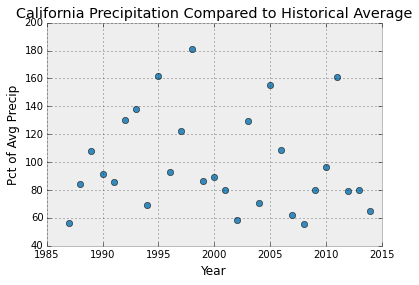

In [25]:
fig, ax = plt.subplots()
ax.plot(yearly.index, yearly, marker='o', linestyle='')
ax.set_xlabel('Year')
ax.set_ylabel('Pct of Avg Precip')
ax.set_title('California Precipitation Compared to Historical Average')
ax.grid(True)

### subplots

The second `'pct of avg'` plot we made with ten lines was a bit much,
an alternative is to make a figure with ten subplots, one for each region.
To make a figure with ten subplots we again use the `subplots` function,
but tell it the number of rows and columns of subplots we want:

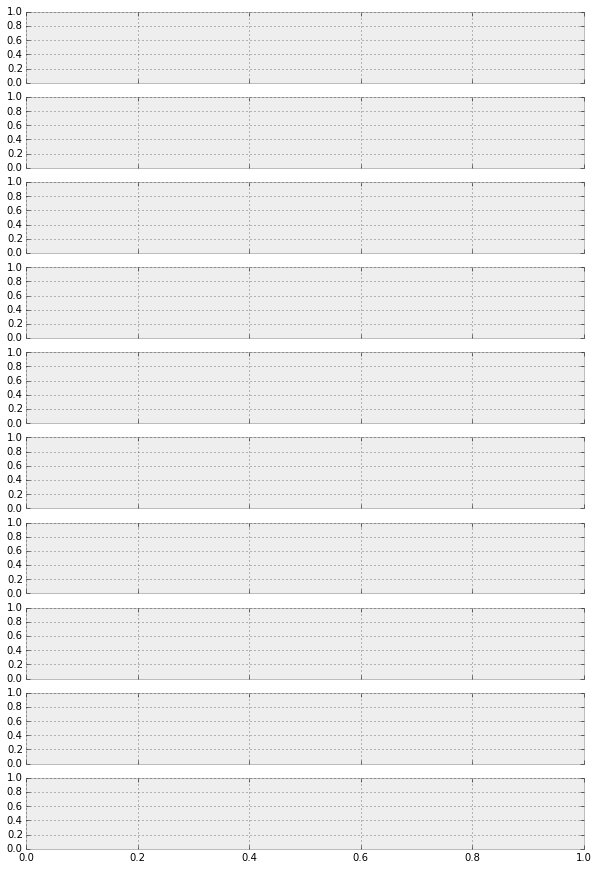

In [26]:
fig, axes = plt.subplots(nrows=10, ncols=1, sharex=True, figsize=(10, 15))

`axes` is a little different than the `ax` variable we used for the last plot

In [27]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e8156d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10eba77b8>], dtype=object)

Our strategy this time is loop over all the different subplots and individually create each one.
To do that we also need to loop over the data we want to plot. Let's look at `regional_yearly` again:

In [28]:
regional_yearly.head()

region,CENTRAL COAST,COLORADO RIVER,NORTH COAST,NORTH LAHONTAN,SACRAMENTO RIVER,SAN FRANCISCO BAY,SAN JOAQUIN RIVER,SOUTH COAST,SOUTH LAHONTAN,TULARE LAKE
year,,,,,,,,,,
1987,42.963235,127.191489,66.625000,49.486111,51.272727,29.791667,37.525641,79.644578,63.905405,64.423197
1988,84.159722,160.106383,79.102273,65.840278,73.265152,71.763889,75.301639,103.971591,116.647436,90.897281
1989,73.601504,29.212766,110.083333,138.909722,152.764706,109.555556,117.412162,47.780899,71.961538,87.750809
1990,73.187500,101.021277,115.355311,103.604167,96.526515,110.535714,85.653846,93.023121,90.865385,62.351171
1991,84.104167,94.978723,95.228782,104.612903,87.687500,78.059524,77.919872,111.814607,77.525641,63.824916


We can loop over the columns and use each one to make a plot!
Since I want to loop over both the columns and the axes I'm going to use Python's
[zip](https://docs.python.org/3/library/functions.html#zip) function:

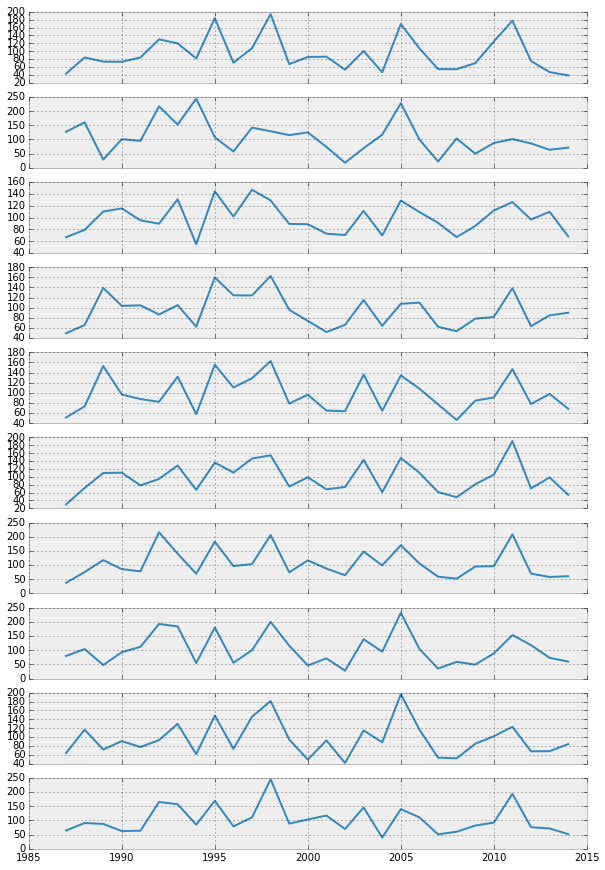

In [29]:
fig, axes = plt.subplots(nrows=10, ncols=1, sharex=True, figsize=(10, 15))
for col_name, ax in zip(regional_yearly.columns, axes):
    col = regional_yearly[col_name]
    ax.plot(col.index, col)

So that worked, but we need to include things like axis labels and titles, 
and it'd be nice all the subplots had the same y-scale.
We can take care of all of that in the loop:

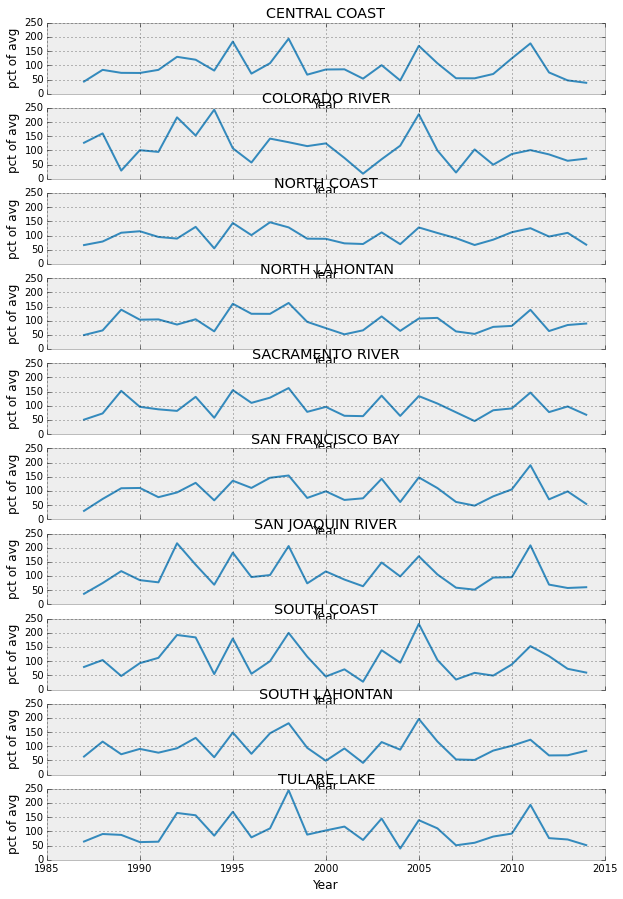

In [30]:
fig, axes = plt.subplots(nrows=10, ncols=1, sharex=True, figsize=(10, 15))
for col_name, ax in zip(regional_yearly.columns, axes):
    col = regional_yearly[col_name]
    ax.plot(col.index, col)
    ax.set_xlabel('Year')
    ax.set_ylabel('pct of avg')
    ax.set_ylim(0, 250)
    ax.set_title(col_name)

Ok, now things have gotten a bit crowded.
As a final step we can tell matplotlib to neatly arrange everything using the `.title_layout()` method:

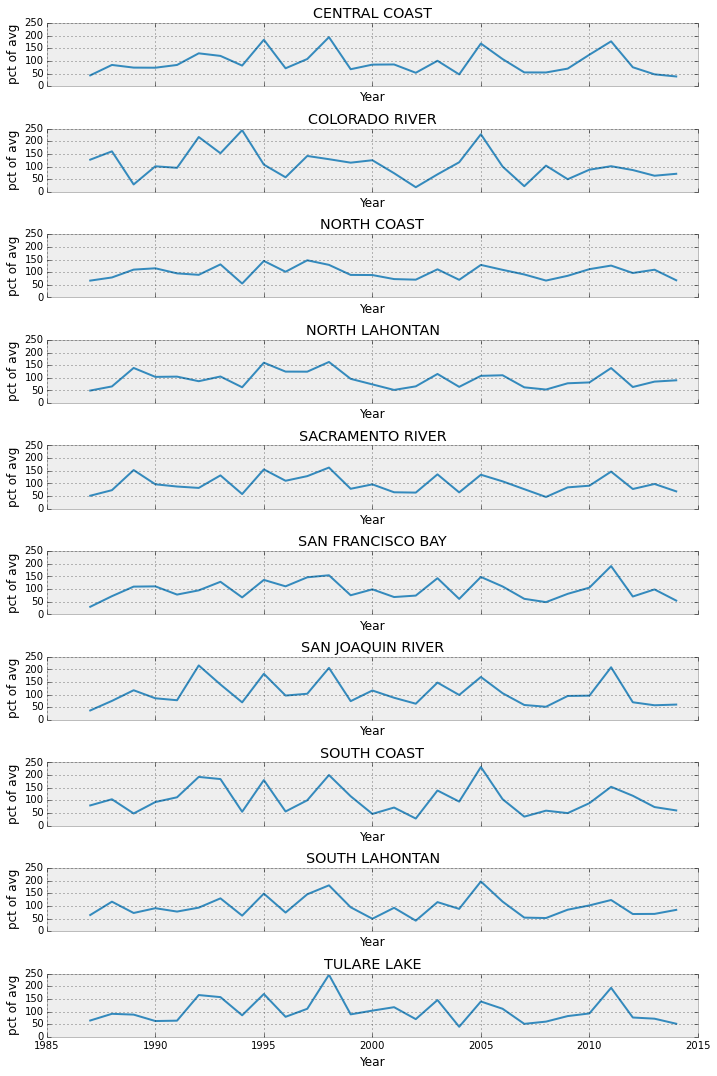

In [31]:
fig.tight_layout()
fig

## seaborn

Seaborn is another plotting library, also built on top of matplotlib. Seaborn provides a very nice default style, as well as several functions that make it easy to create beautiful and sophisticated plots.

Note: Seaborn offers many more plotting utilities beyond the examples we'll go through here. We recommend checking out their tutorial to see all of the options that Seaborn has to offer!

http://stanford.edu/~mwaskom/software/seaborn/tutorial.html

First off, just importing Seaborn will change the default style:

In [32]:
import seaborn as sns

The style is a bit similar to the bmh style we set earlier, though the colors are a bit different, and there are some other changes (for example, the figure size is larger by default):

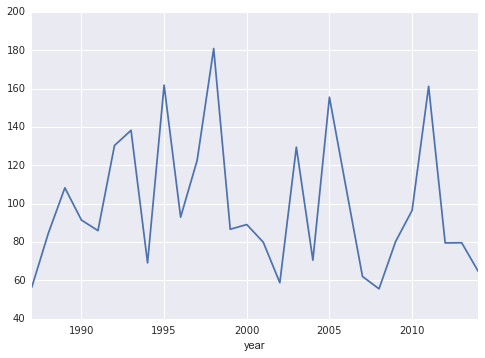

In [33]:
yearly.plot()

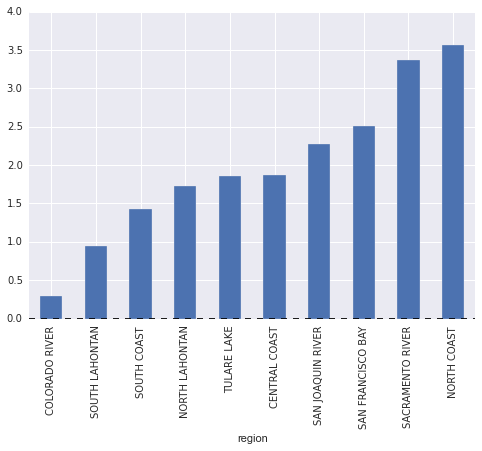

In [34]:
regional.sort(inplace=False).plot(kind='bar')

Seaborn also includes tools to construct sophisticated plots very quickly. For example, recall the box plot that we created earlier:

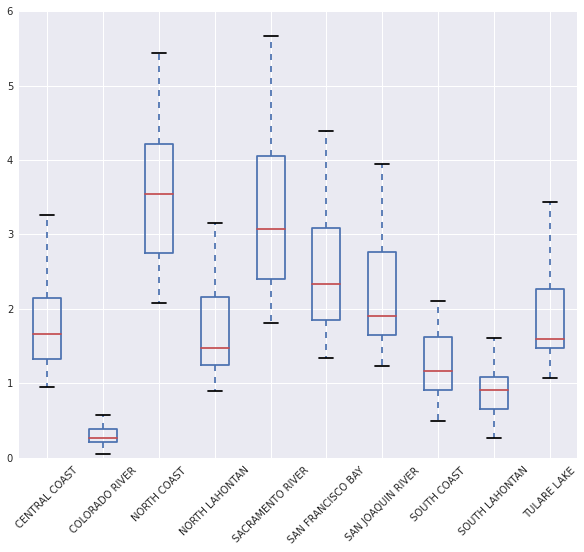

In [35]:
regional_yearly = monthly.groupby(['year', 'region'])['precip'].mean().unstack('region')
regional_yearly.plot(kind='box', figsize=(10, 8), rot=45)

Seaborn gives us a method to create a similar type of plot called a "violin" plot. This plot provides a little bit more information than a box plot, as it additionally shows the true distribution of the data (not just the median and quantiles). This often has a shape that looks curvy, sometimes like a violin, hence the name.

First, we need to convert our data into a form that Seaborn can work with:

In [36]:
# make the columns into an index
df = regional_yearly.stack()

# convert from Series to DataFrame
df = df.to_frame('precip')

# turn the index back into columns
df = df.reset_index()

df.head()

,year,region,precip
0,1987,CENTRAL COAST,1.090809
1,1987,COLORADO RIVER,0.247500
2,1987,NORTH COAST,2.681029
3,1987,NORTH LAHONTAN,0.891042
4,1987,SACRAMENTO RIVER,1.816042


Then, to create the violin plot, we tell Seaborn that it should plot the region on the x-axis, precipitation on the y-axis, and that the quartiles should be displayed inside each violin:

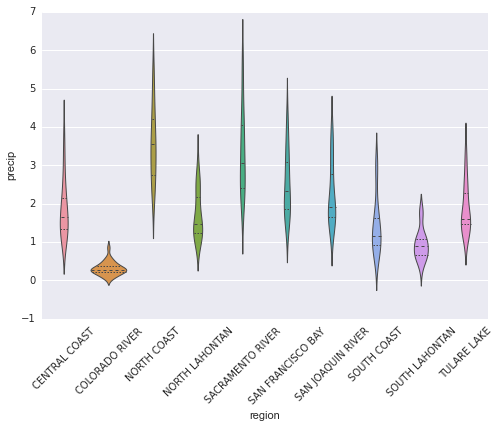

In [41]:
plt.xticks(rotation=45)
sns.violinplot(x='region', y='precip', data=df, inner='quartile', linewidth=1)

### Grids of subplots

Seaborn also provides an easy way to create complex plots like the subplots we had above. We can create this figure using `FacetGrid`, where we specify that each row will correspond to a different region. We then tell the grid to create a plot with `year` on the x-axis and `precip` on the y-axis for each region: 

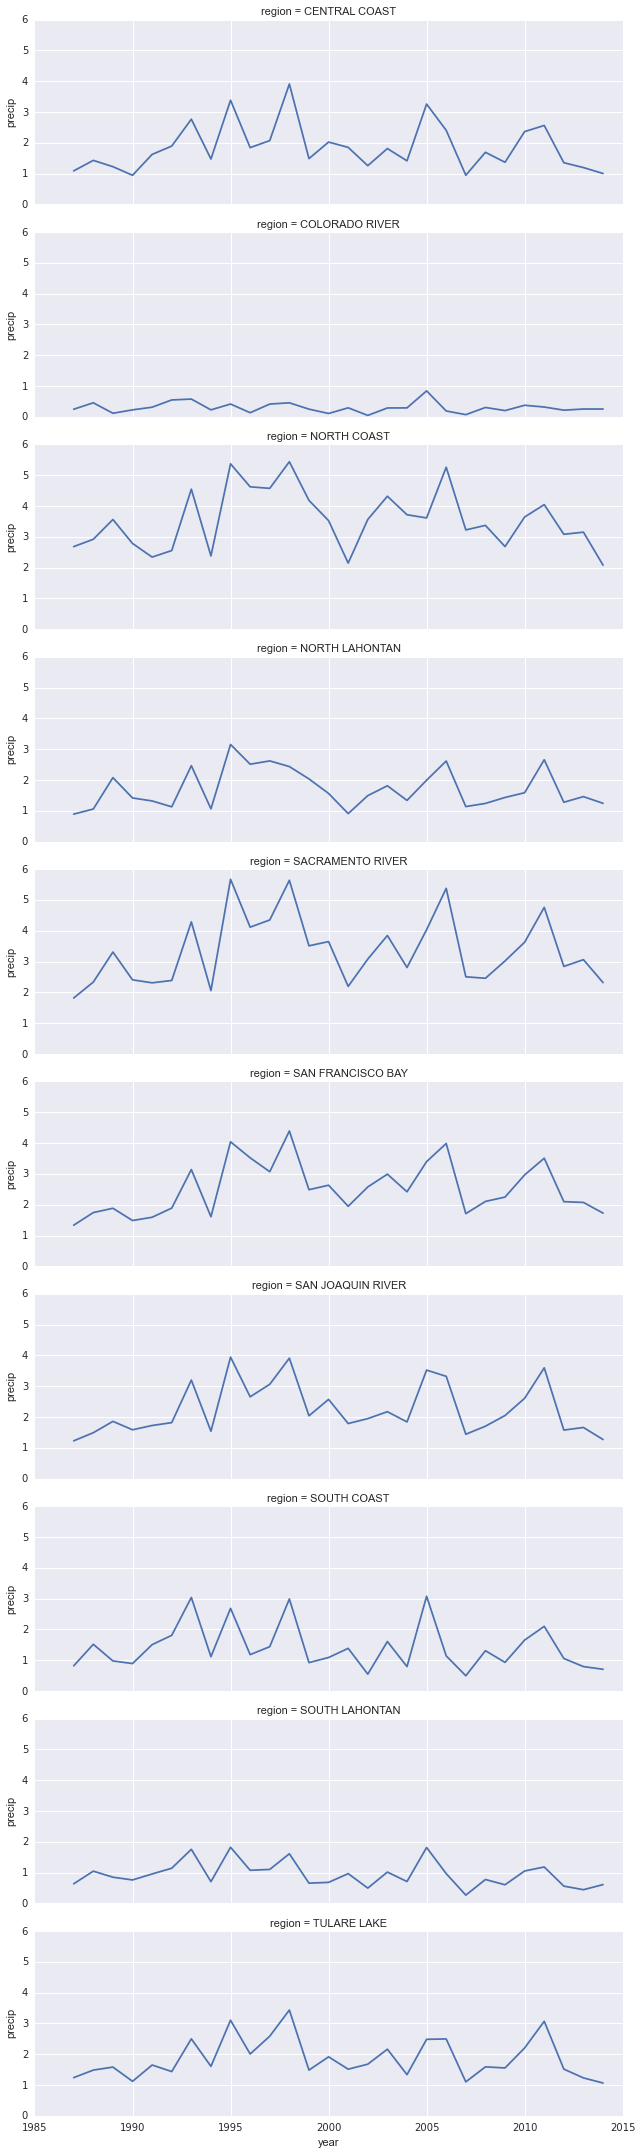

In [38]:
# Initialize a grid of plots with an Axes for each region
grid = sns.FacetGrid(df, row="region", aspect=3)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "year", "precip")

Another type of figure with a grid of subplots is called a "pair plot", where the columns of a data frame are plotted against each other. In the case of the precipitation data, we could look at how the average precipitation compares between different regions. 

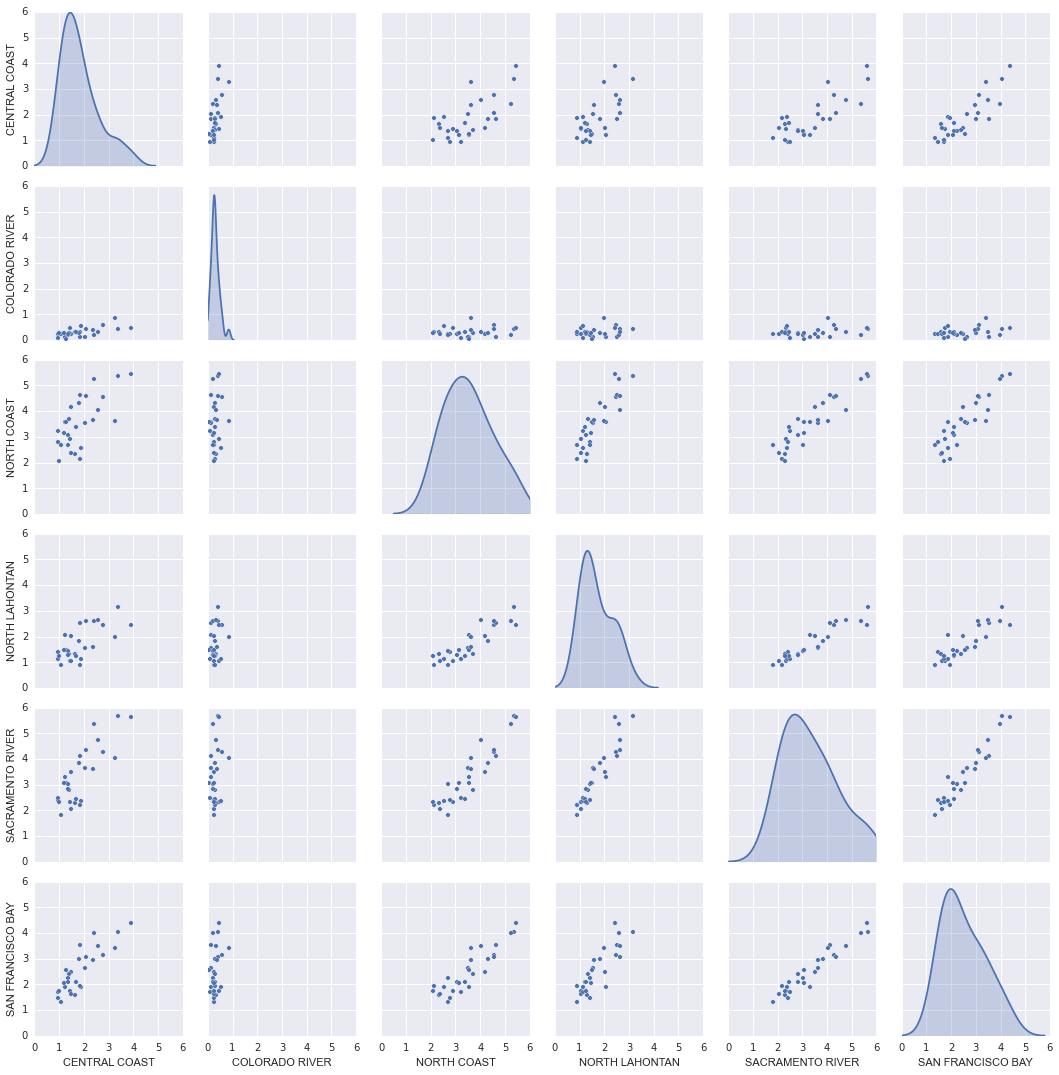

In [39]:
# only use the first few regions
cols = regional_yearly.columns[:6]

# create the pairplot
grid = sns.pairplot(regional_yearly[cols], diag_kind='kde', diag_kws=dict(shade=True))

# synchronize the axis limits
grid.set(xlim=(0, 6), ylim=(0, 6))